In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data-final.csv to data-final.csv


In [56]:
clust_personality = pd.read_csv('data-final.csv', sep = '\t')
clustPersNum = clust_personality.copy()

In [4]:
clustPersNum.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4,1,5,2,5,1,5,2,4,1,...,2016-03-03 02:01:01,768,1024,9,234,6,1,GB,51.5448,0.1991
1,3,5,3,4,3,3,2,5,1,5,...,2016-03-03 02:01:20,1360,768,12,179,11,1,MY,3.1698,101.706
2,2,3,4,4,3,2,1,3,2,5,...,2016-03-03 02:01:56,1366,768,3,186,7,1,GB,54.9119,-1.3833
3,2,2,2,3,4,2,2,4,1,4,...,2016-03-03 02:02:02,1920,1200,186,219,7,1,GB,51.75,-1.25
4,3,3,3,3,5,3,3,5,3,4,...,2016-03-03 02:02:57,1366,768,8,315,17,2,KE,1.0,38.0


In [60]:
clustPersNum = clustPersNum.drop(["dateload",
"screenw",
"screenh",
"introelapse",
"testelapse",
"endelapse",
"IPC",
"country",
"lat_appx_lots_of_err",
"long_appx_lots_of_err"],axis=1)

In [61]:
clustPersNum.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,8.387317e+03,1.301447e+04,7.190824e+03,1.328973e+04,6.281839e+03,8.256577e+03,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,9.316817e+05,1.221542e+06,3.763687e+05,3.047610e+06,3.414014e+05,5.642692e+05,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.392774e+07,-2.152050e+05,-4.170310e+05,-7.446700e+04,-1.281720e+05,-7.125690e+06,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.073250e+03,3.054000e+03,1.864000e+03,2.680000e+03,1.976000e+03,2.364000e+03,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.026000e+03,4.254000e+03,2.752000e+03,3.739000e+03,2.831000e+03,3.337000e+03,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.564000e+03,6.230000e+03,4.283000e+03,5.537000e+03,4.267000e+03,4.945000e+03,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,6.750470e+08,1.026126e+09,1.936519e+08,2.147484e+09,1.626808e+08,2.726280e+08,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08


In [62]:
clustPersNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 100 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  A

<Axes: >

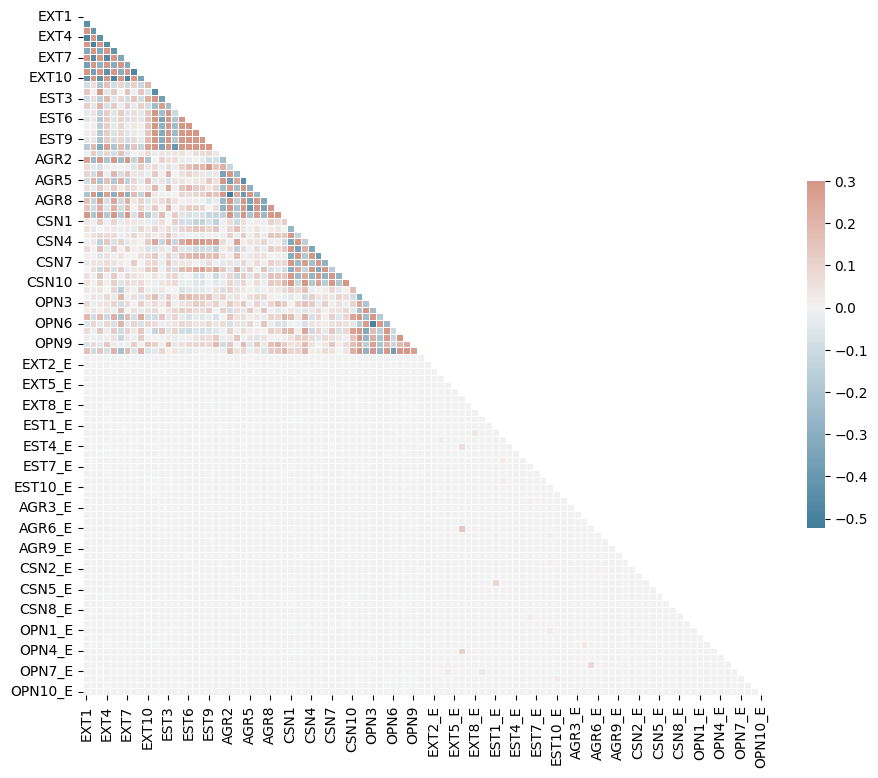

In [63]:
# Compute the correlation matrix - bo dane mamy numeryczne
corr = clustPersNum.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [64]:
cols = clustPersNum.columns

In [65]:
# żeby kmeans lepiej dzialalo trzeba przeskalowac dane
scale = StandardScaler()
scaledData = pd.DataFrame(scale.fit_transform(clustPersNum), columns = cols)
scaledData.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
0,1.069224,-1.339269,1.408760,-0.921736,1.348662,-1.143083,1.591230,-1.112353,0.769859,-1.958633,...,-0.005626,-0.007325,-0.011244,-0.003241,-0.012044,-0.005913,-0.005569,-0.008776,-0.007755,-0.002228
1,0.278339,1.682010,-0.237323,0.694502,-0.216783,0.488611,-0.551113,1.246296,-1.458903,1.105957,...,-0.006186,-0.006573,-0.014631,-0.003368,-0.004510,-0.008720,-0.008510,-0.007795,-0.007513,-0.005257
2,-0.512546,0.171371,0.585719,0.694502,-0.216783,-0.327236,-1.265228,-0.326137,-0.715982,1.105957,...,-0.006931,-0.009451,-0.014738,-0.003808,-0.011871,-0.000253,-0.009665,0.003312,-0.011028,-0.006368
3,-0.512546,-0.583949,-1.060364,-0.113617,0.565940,-0.327236,-0.551113,0.460080,-1.458903,0.339810,...,-0.005293,-0.005198,-0.013853,-0.003137,-0.006309,-0.007941,-0.008055,-0.004685,-0.006620,-0.004717
4,0.278339,0.171371,-0.237323,-0.113617,1.348662,0.488611,0.163001,1.246296,0.026939,0.339810,...,0.000076,-0.007781,0.026174,-0.002054,-0.011584,-0.004292,-0.001444,-0.000395,0.011806,0.007499


In [66]:
scaledData = scaledData.dropna()

In [67]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scaledData)
print(pca.explained_variance_ratio_)

# otrzymujemy dla kazdej z kolumn, ile dany komponent przetrzymuje wariancji danych

[0.07195875 0.05000075 0.03970139 0.03492895 0.02781355 0.02012806
 0.01313098 0.01187664 0.01098021 0.01083854 0.01055658 0.01047553
 0.010331   0.01029056 0.01021059 0.01018031 0.01017279 0.01014562
 0.01012274 0.01011814 0.0100633  0.01005435 0.01004031 0.0100319
 0.01002929 0.01000876 0.01000611 0.01000547 0.01000357 0.01000238
 0.01000081 0.01000013 0.00999971 0.00999898 0.00999804 0.00999716
 0.00999521 0.00999339 0.00999208 0.00998661 0.00997998 0.00997502
 0.00995974 0.00994769 0.00993531 0.00990066 0.00988102 0.00987202
 0.00984111 0.0098238  0.0097956  0.00972315 0.00969795 0.00952248
 0.0094771  0.00933911 0.0091656  0.00902234 0.00890624 0.00873195
 0.00820575 0.00816703 0.00812559 0.00785382 0.00774188 0.0073336
 0.00717073 0.00694703 0.0068092  0.00650676 0.00646467 0.00635662
 0.0060277  0.00596377 0.00588789 0.00566838 0.00550425 0.00531678
 0.00531352 0.00517797 0.00508466 0.00492786 0.0048818  0.00463866
 0.00446936 0.00436396 0.00432615 0.00425327 0.00418637 0.004135

In [68]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

# zakladamy ze kumulowana suma wariancji ma byc >= .95, otrzymujemy wynik ze 87 naszych komponentow spelnia ten warunek

87


In [69]:
pca = PCA(n_components=6)
reducedData = pca.fit_transform(scaledData)
recoveredData = pca.inverse_transform(reducedData)
# transformacja zwyklych danych na komponenty
#reducedData
recoveredData

array([[ 1.16426646e+00, -1.27164580e+00,  1.09834963e+00, ...,
        -1.95793258e-03,  1.29012820e-04,  1.33184794e-03],
       [-9.75970903e-01,  8.76072348e-01, -3.82253626e-01, ...,
         1.88885752e-03,  1.08512161e-03, -9.53478700e-04],
       [-6.71797371e-01,  2.81362387e-01, -3.43760268e-01, ...,
        -4.02215530e-04, -4.93855987e-04,  5.31185397e-04],
       ...,
       [ 9.97116201e-01, -8.30781741e-01,  5.79932122e-01, ...,
        -1.47049818e-03,  1.63824816e-03, -8.82439609e-04],
       [-8.18454108e-01,  6.33796664e-01, -7.94489574e-01, ...,
        -2.51967627e-03, -2.76356947e-03, -1.52860101e-04],
       [ 6.09479375e-01, -7.67718029e-01,  5.14226183e-01, ...,
        -2.26795105e-03,  1.06606058e-03,  9.80540809e-04]])

In [70]:
reducedData.shape
# jak wygladaja dane po transformacji

(1013558, 6)

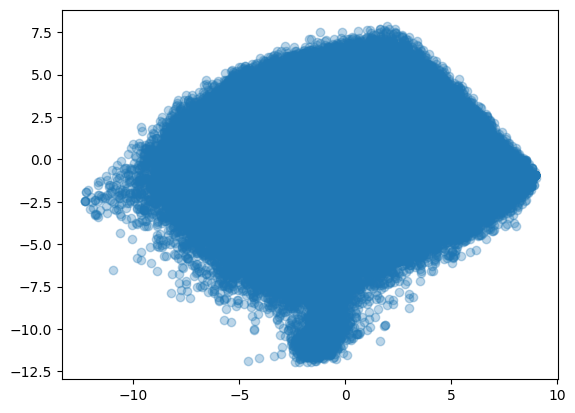

In [71]:
plt.scatter(reducedData[:, 0], reducedData[:, 1], alpha=0.3, label="samples")

#każdy punkt jest mixem różnych danych, wiec z tego te punkty nie sa interpretowalne

Text(0.5, 0, 'PC3 Label')

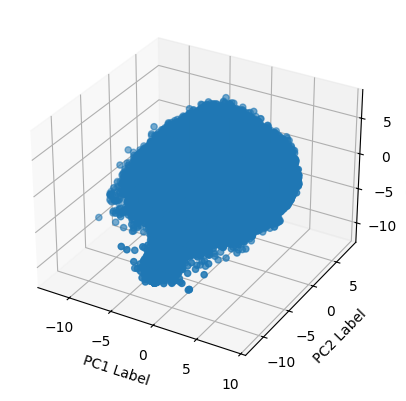

In [72]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(reducedData[:, 0], reducedData[:, 1], reducedData[:, 2])
ax.set_xlabel('PC1 Label')
ax.set_ylabel('PC2 Label')
ax.set_zlabel('PC3 Label')

# wizualizacja 3D

In [73]:
from sklearn.model_selection import train_test_split
# wyliczamy silhouette score dla różnej ilości klastrów, od 1 do 10, dla każdej wypluwa odległości punktów
# korzystam z mniejszej próbki, która i tak wywoływała się 20 minut, a ze wszystkich danych po 5 godzinach dalej się nie przeładowało.
sampledData, _ = train_test_split(reducedData, test_size=0.9, random_state=42)  # 10% danych na próbkę

wcss = []
silhouette = []
for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(sampledData)
    wcss.append(kmeans.inertia_)
    if cluster > 1:
        silhouette.append(silhouette_score(sampledData, kmeans.labels_))  # Silhouette score na próbce


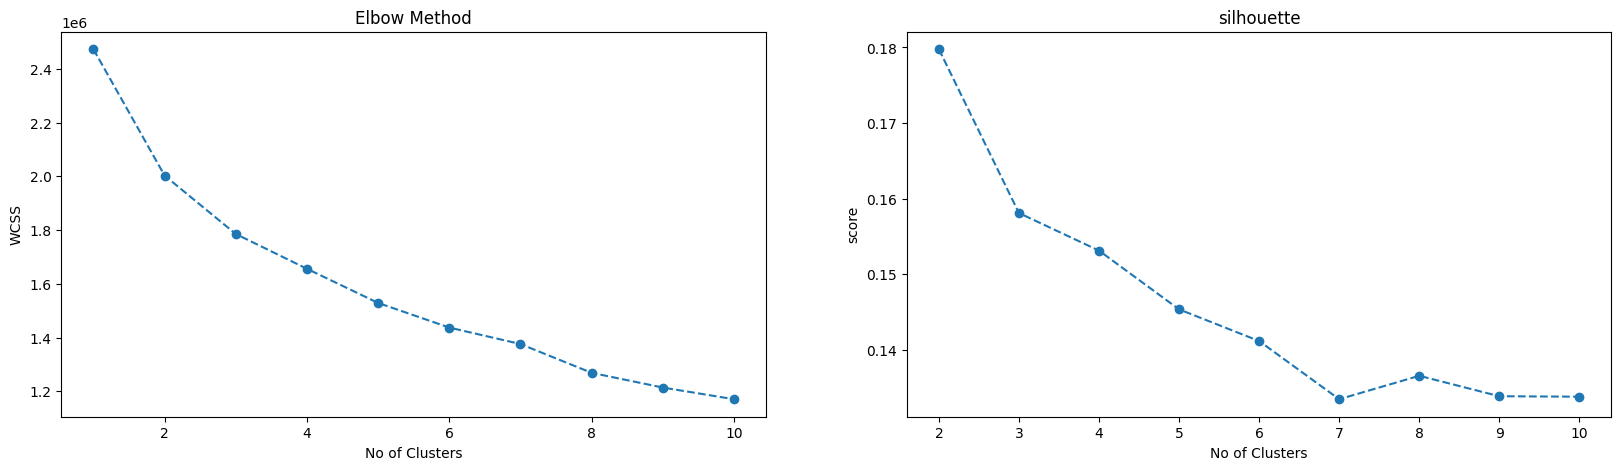

In [74]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2,11), silhouette, 'o--')
plt.title('silhouette')
plt.xlabel('No of Clusters')
plt.ylabel('score')

plt.show()

# z wykresu silhouette dobrze widać że 2 to najlepsza ilość klastrów, w ten sposób najlepiej można opisać dane, żeby były blisko swojego centroidu a daleko innego

In [75]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(reducedData)

KMeans(n_clusters=2, random_state=42)

In [76]:
kmeans.labels_

# każdy element w naszej tabelce uzyskał swój label, teraz można by przejść do klasyfikacji

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [77]:
kmeans.inertia_

# jak daleko dane odchodzą od centroidu, zazwyczaj im mniejsza tym lepsza jeśli porównujemy np z innym skalowaniem, tutaj ta odległość jest bardzo duża, ale myśle,
# że jest to spowodowane tym, że mamy dużą ilość danych i tylko dwa klastry

23463771.77107217

In [78]:
kmeans.score(reducedData)

-23463771.77107217

In [79]:
clustPersNum

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2649.0,3544.0,7577.0,3096.0,1896.0,3912.0,2744.0,2025.0,1873.0,1232.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2560.0,6632.0,2312.0,2376.0,2969.0,2271.0,4064.0,1144.0,2936.0,1615.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2121.0,2807.0,1711.0,2335.0,1609.0,3007.0,2727.0,2648.0,2646.0,1287.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5024.0,4664.0,4792.0,6471.0,1873.0,3136.0,3129.0,2799.0,7184.0,2526.0


In [80]:
pd.DataFrame({'clusters':kmeans.labels_})

,clusters
0,1
1,1
2,1
3,1
4,1
...,...
1013553,1
1013554,1
1013555,1
1013556,1


In [81]:
personality_kmeans = pd.concat([clustPersNum,pd.DataFrame({'clusters':kmeans.labels_})], axis=1)

In [82]:
personality_kmeans["clusters"].value_counts()

,count
clusters,
1.0,1008657
0.0,4901


In [83]:
personality_kmeans[personality_kmeans["clusters"] == 0]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,clusters
485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1019,3.0,3.0,4.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,...,4421.0,4066.0,3304.0,2479.0,2424.0,0.0,0.0,0.0,0.0,0.0
1168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1248,3.0,5.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,3141028.0,0.0,0.0,1632120.0,0.0,0.0,0.0,0.0
1566,0.0,1.0,5.0,1.0,5.0,3.0,0.0,0.0,0.0,0.0,...,9921.0,7537.0,27678.0,4355.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012789,1.0,0.0,2.0,4.0,2.0,3.0,2.0,5.0,1.0,4.0,...,1456.0,1576.0,1568.0,1960.0,1671.0,1895.0,1248.0,1647.0,1569.0,0.0
1012841,1.0,3.0,3.0,4.0,2.0,3.0,2.0,4.0,2.0,4.0,...,8881.0,1446.0,3118.0,0.0,2971.0,1616.0,4345.0,3830.0,2539.0,0.0
1013069,1.0,5.0,2.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,...,49912.0,6596.0,6070.0,2732.0,4784.0,8500.0,2561.0,4343.0,3890.0,0.0
1013340,2.0,3.0,5.0,4.0,5.0,3.0,4.0,5.0,5.0,3.0,...,2101.0,3154.0,6192.0,2056.0,2756.0,8641.0,3806.0,2718.0,1619.0,0.0


In [84]:
personality_kmeans[personality_kmeans["clusters"] == 1]

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,1.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,1.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,1.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,1.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013553,1.0,4.0,1.0,5.0,1.0,3.0,1.0,5.0,2.0,5.0,...,4950.0,6985.0,4634.0,2021.0,3676.0,3252.0,2859.0,853.0,1609.0,1.0
1013554,1.0,5.0,2.0,4.0,2.0,2.0,3.0,5.0,2.0,5.0,...,3339.0,2876.0,6444.0,3546.0,4350.0,3632.0,5644.0,2643.0,2749.0,1.0
1013555,2.0,3.0,1.0,5.0,1.0,4.0,3.0,5.0,2.0,5.0,...,3967.0,1824.0,2421.0,1876.0,3363.0,1996.0,2758.0,2598.0,1017.0,1.0
1013556,1.0,4.0,1.0,4.0,5.0,2.0,1.0,5.0,1.0,5.0,...,4144.0,3408.0,2440.0,1816.0,2752.0,1936.0,3289.0,1736.0,3280.0,1.0


In [85]:
# tutaj zaczynam szukać najlepszych parametrów DBSCAN

In [86]:
from sklearn.cluster import DBSCAN
# pierwsza opcja parametrow
dbscan_clust = DBSCAN(eps=1.0, min_samples=5).fit(sampledData)

In [88]:
dbscan_clust.labels_

array([ 0,  0,  0, ..., -1,  0,  0])

In [89]:
num_neg_one = (dbscan_clust.labels_ == -1).sum()
num_zeros = (dbscan_clust.labels_ == 0).sum()
num_ones = (dbscan_clust.labels_ == 1).sum()
num_twos = (dbscan_clust.labels_ == 2).sum()
num_3s = (dbscan_clust.labels_ == 3).sum()

print(num_neg_one,"\n",num_zeros, "\n",num_ones, "\n",num_twos, "\n", num_3s)

31416 
 67789 
 5 
 296 
 9


In [90]:
# druga opcja parametrow
dbscan_clust = DBSCAN(eps=0.3, min_samples=3).fit(sampledData)

In [91]:
dbscan_clust.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [92]:
num_neg_one = (dbscan_clust.labels_ == -1).sum()
num_zeros = (dbscan_clust.labels_ == 0).sum()
num_ones = (dbscan_clust.labels_ == 1).sum()
num_twos = (dbscan_clust.labels_ == 2).sum()
num_3s = (dbscan_clust.labels_ == 3).sum()

print(num_neg_one,"\n",num_zeros, "\n",num_ones, "\n",num_twos, "\n", num_3s)

100956 
 238 
 27 
 52 
 55


In [93]:
# trzecia opcja parametrow
dbscan_clust = DBSCAN(eps=1.4, min_samples=14).fit(sampledData)

In [94]:
dbscan_clust.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
num_neg_one = (dbscan_clust.labels_ == -1).sum()
num_zeros = (dbscan_clust.labels_ == 0).sum()
num_ones = (dbscan_clust.labels_ == 1).sum()
num_twos = (dbscan_clust.labels_ == 2).sum()
num_3s = (dbscan_clust.labels_ == 3).sum()

print(num_neg_one,"\n",num_zeros, "\n",num_ones, "\n",num_twos, "\n", num_3s)

12531 
 88405 
 311 
 33 
 61


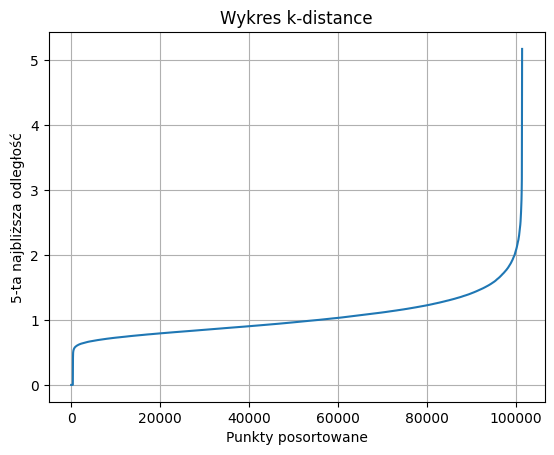

In [87]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)  # min_samples = 5
neighbors_fit = neighbors.fit(sampledData)
distances, indices = neighbors_fit.kneighbors(sampledData)

# posortuj 5-te najbliższe odległości (czyli k-distance)
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel("Punkty posortowane")
plt.ylabel("5-ta najbliższa odległość")
plt.title("Wykres k-distance")
plt.grid(True)
plt.show()

In [ ]:
# według powyższego wykresu najlepszą wartością eps jest 2

In [97]:
dbscan_clust = DBSCAN(eps=2, min_samples=5).fit(sampledData)

In [98]:
dbscan_clust.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
num_neg_one = (dbscan_clust.labels_ == -1).sum()
num_zeros = (dbscan_clust.labels_ == 0).sum()
num_ones = (dbscan_clust.labels_ == 1).sum()
num_twos = (dbscan_clust.labels_ == 2).sum()
num_3s = (dbscan_clust.labels_ == 3).sum()

print(num_neg_one,"\n",num_zeros, "\n",num_ones, "\n",num_twos, "\n", num_3s)

621 
 100718 
 3 
 5 
 5
